In [1]:
# importing libraries
import idx2numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the train test features and respective labels
trainImages = "Desktop/train-images.idx3-ubyte"
trainImages = idx2numpy.convert_from_file(trainImages)

testImages = "Desktop/t10k-images-idx3-ubyte"
testImages = idx2numpy.convert_from_file(testImages)

trainLabels = "Desktop/train-labels.idx1-ubyte"
trainLabels = idx2numpy.convert_from_file(trainLabels)

testLabels = "Desktop/t10k-labels-idx1-ubyte"
testLabels = idx2numpy.convert_from_file(testLabels)

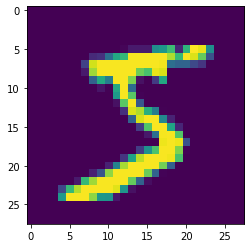

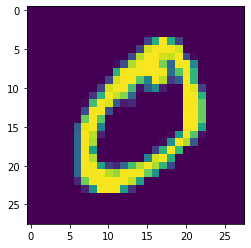

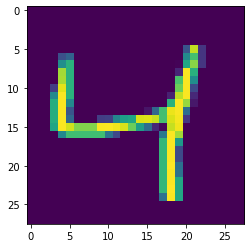

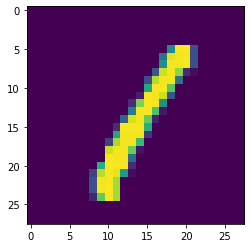

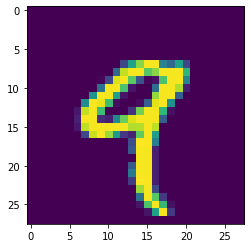

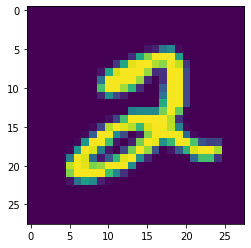

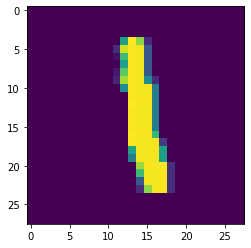

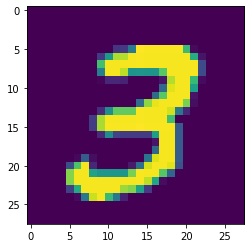

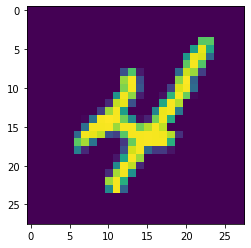

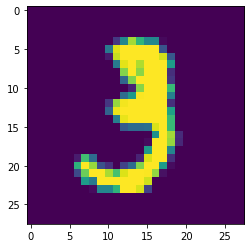

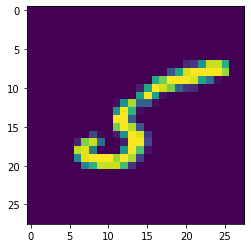

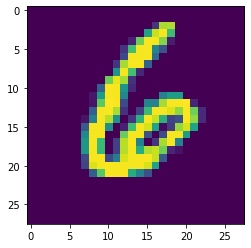

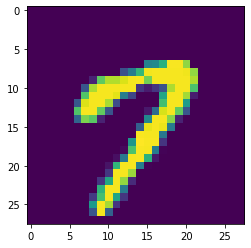

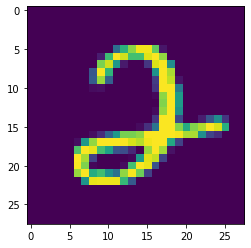

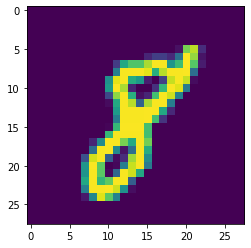

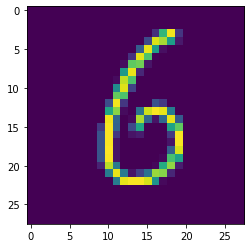

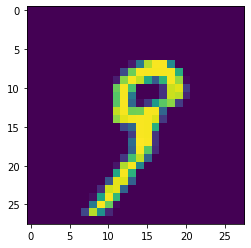

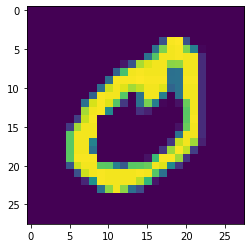

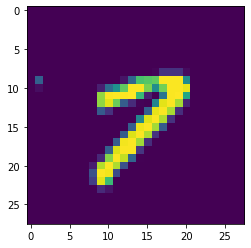

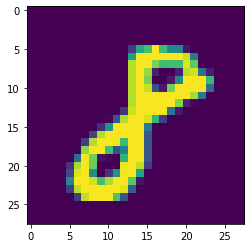

In [3]:
# visualizing 2 images of each of the 9 classes
# using a hashmap 
classDigits = dict()
for i in range(0,10):
    classDigits[i] = 2

for i in range(len(trainLabels)):
    if classDigits[trainLabels[i]] >= 1: # visualizing a class only twice
        plt.imshow(trainImages[i])
        plt.show();
        classDigits[trainLabels[i]] = classDigits[trainLabels[i]] - 1 # each time an image is shown decrementing its value by 1
        

In [4]:
# converting x_Test from 3D to 2D.
# converting x_Train from 3D to 2D: taking each picture of 28*28 pixels and flattening it row wise one after the other.
# Thus now we have 60,000 images(rows) each of whose 784 columns are the 28*28 pixels

train_df = pd.DataFrame(np.array(trainImages).
                        reshape(trainImages.shape[0],trainImages.shape[1]*trainImages.shape[2]))

test_df = pd.DataFrame(np.array(testImages).
                        reshape(testImages.shape[0],testImages.shape[1]*testImages.shape[2]))

### One vs Rest Classifier

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

ovr = LogisticRegression(multi_class='ovr')

ovr.fit(train_df, trainLabels) #fit model
pred = ovr.predict(test_df) #make predictions

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

In [6]:
# class wise accuracy
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(testLabels, pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.97653061, 0.98325991, 0.87693798, 0.90594059, 0.92668024,
       0.85426009, 0.94885177, 0.9192607 , 0.87679671, 0.89692765])

In [7]:
from sklearn.metrics import classification_report
print(classification_report(testLabels, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.85      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.83      0.88      0.86       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### One vs One Classifier

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

model = LogisticRegression()
ovo = OneVsOneClassifier(model)

ovo.fit(train_df, trainLabels) # fit model
pred = ovo.predict(test_df) # make predictions

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

In [9]:
# class wise accuracy
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(testLabels, pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.97040816, 0.97709251, 0.91182171, 0.92079208, 0.95723014,
       0.86547085, 0.94050104, 0.92607004, 0.89835729, 0.89692765])

In [10]:
from sklearn.metrics import classification_report
print(classification_report(testLabels, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.91      0.92      1032
           3       0.90      0.92      0.91      1010
           4       0.93      0.96      0.94       982
           5       0.89      0.87      0.88       892
           6       0.95      0.94      0.95       958
           7       0.94      0.93      0.93      1028
           8       0.86      0.90      0.88       974
           9       0.93      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

